In [1]:
using DataFrames
using Random, Distributions, Statistics, Plots, ProgressMeter

In [2]:
Threads.@threads for i in 1:Threads.nthreads()
    println(Threads.threadid())
end # end for

1


## SDE simulations

Time specification

In [3]:
Δₜ = 1 / 1000
time = (1:1000) / 1000;

Simulating process
$$X_{t} = pX_{t-1} + (1-p)Y_{t}, X_{0}=\frac{1}{2}$$
where $Y_{t}\sim b(p)$

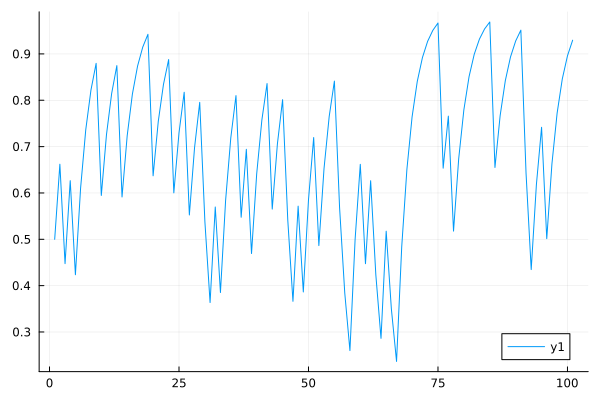

In [4]:
p = .676
X = .5
Xses = Vector{Real}()
push!(Xses, X)
for k in 1:100
    iddx = rand(Bernoulli(p))
    X = (1 - p) * iddx + p * X
    push!(Xses, X)
end # end for
plot(Xses)

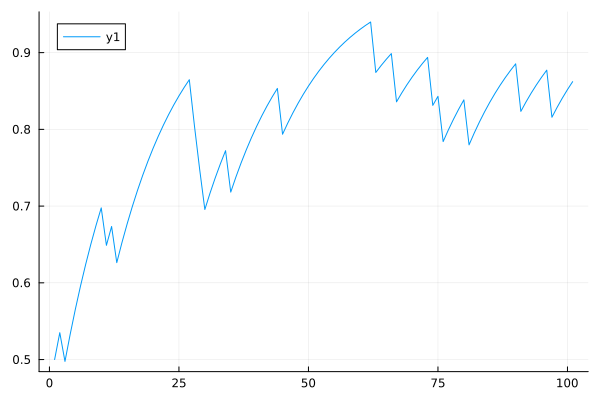

In [5]:
p = .93
X = .5
Xses = Vector{Real}()
push!(Xses, X)
for k in 1:100
    iddx = rand(Bernoulli(p))
    X = (1 - p) * iddx + p * X
    push!(Xses, X)
end # end for
plot(Xses)

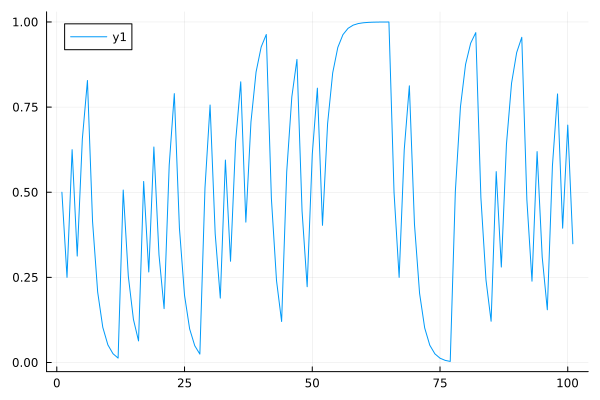

In [6]:
p = .5
X = .5
Xses = Vector{Real}()
push!(Xses, X)
for k in 1:100
    iddx = rand(Bernoulli(p))
    X = (1 - p) * iddx + p * X
    push!(Xses, X)
end # end for
plot(Xses)

Brownian motion

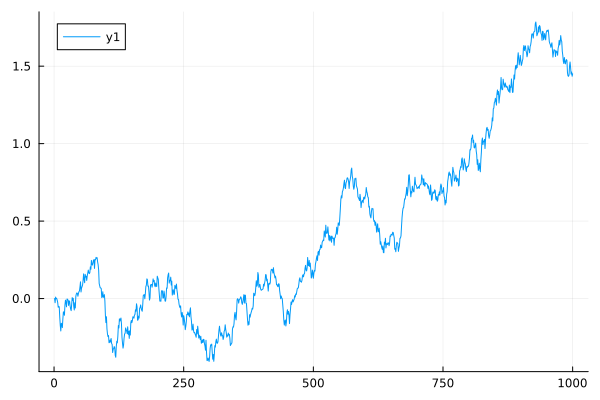

In [7]:
dW = [0.0]
append!(dW, rand(Normal(0, Δₜ ^ .5), length(time) - 1))
W = cumsum(dW)
plot(W)

Solution to SDE: $$dX_{t}=\frac{\exp(W_{t})}{1+\exp(W_{t})}dW_{t}, X_{0}=0$$

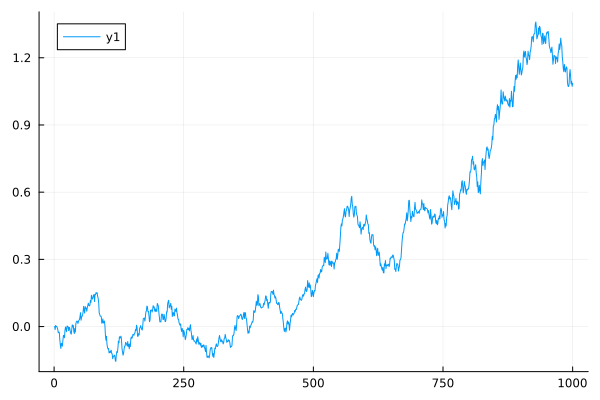

In [8]:
X = cumsum(cdf.(Logistic(), W) .* dW)
plot(X)

Solution to SDE: $$dX_{t}=\frac{\exp(X_{t})}{1+\exp(X_{t})}dW_{t}, X_{0}=0$$

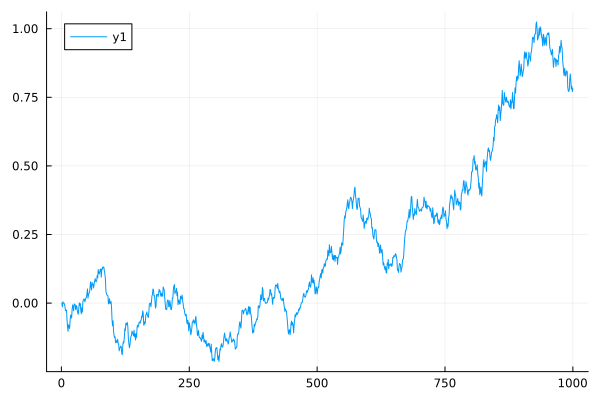

In [9]:
X = [0.0]
for k in 2:length(time)
    push!(X, X[end] + cdf.(Logistic(), X[end]) * dW[k])
end # end for
plot(X)

Sulotion to: $$dX_{t}=cos(W_{t})dW_{t}+sin(X_{t})dt, X_{0}=0$$

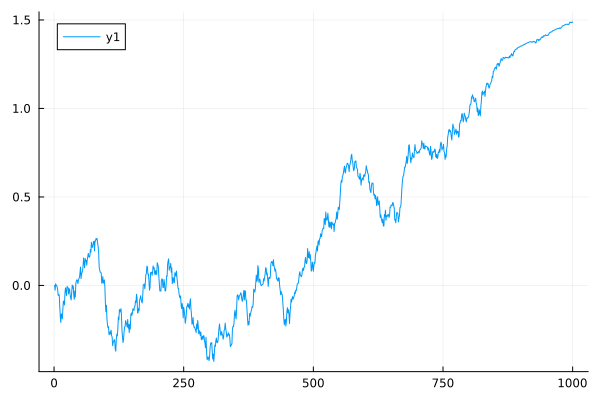

In [10]:
X = [0.0]
for k in 2:length(time)
    push!(X, X[end] + cos(W[k-1]) * dW[k] + sin(X[end]) * Δₜ)
end # end for
plot(X)

## Filtering

Suppose that we observe stochastic process $\xi = (\xi_{t}, \mathcal{F}_{t})$ which satisfies:
$$d\xi_{t}=\theta dt+dW_{t}$$
where $\theta\sim b(p)$. Then an optimal estimator, in terms of mean squared error, for $\theta$ given $\xi$ at time $t$ is:
$$\hat{\theta}^{(t)}=\mathbb{E}\left[\theta|\mathcal{F}_{t}^{\xi}\right]=\frac{\frac{p}{1-p}\exp\left(\xi_{t}-\frac{t}{2}\right)}{1+\frac{p}{1-p}\exp\left(\xi_{t}-\frac{t}{2}\right)}$$
which also satisfies SDE:
$$d\hat{\theta}^{(t)}=\hat{\theta}^{(t)}\left(1-\hat{\theta}^{(t)}\right)d\xi_{t}-\left(\hat{\theta}^{(t)}\right)^{2}\left(1-\hat{\theta}^{(t)}\right)dt, \hat{\theta}^{(0)}=p$$

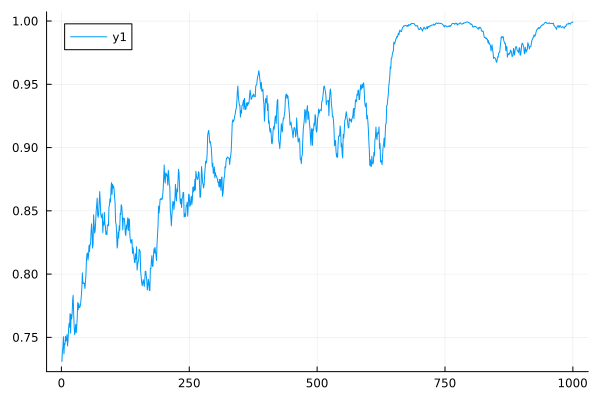

In [11]:
dW = [0.0]
append!(dW, rand(Normal(0, Δₜ ^ .5), length(time) - 1))
W = cumsum(dW)
p = .5
θ = rand(Bernoulli(p))

dξ = [0.0]
append!(dξ, dW[2:end] .+ θ * Δₜ)
ξ = cumsum(dξ)
θ̂ = cdf.(Logistic(), (p / (1 - p)) .* exp.(ξ .- time ./ 2))
plot(θ̂)

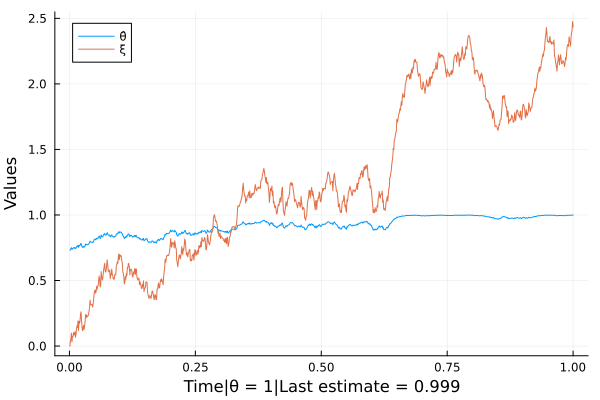

In [12]:
plot(time, [θ̂, ξ], label=["θ̂" "ξ"])
xlabel!("Time|θ = " * string(θ * 1) * "|Last estimate = " * string(round(θ̂[end]; digits = 3)))
ylabel!("Values")

When $p\neq\frac{1}{2}$

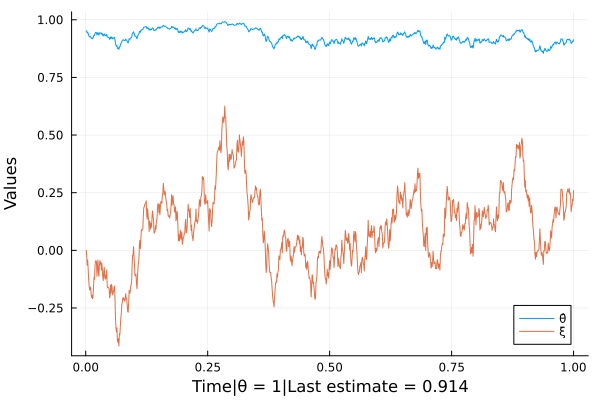

In [13]:
dW = [0.0]
append!(dW, rand(Normal(0, Δₜ ^ .5), length(time) - 1))
W = cumsum(dW)
p = .75
θ = rand(Bernoulli(p))

dξ = [0.0]
append!(dξ, dW[2:end] .+ θ * Δₜ)
ξ = cumsum(dξ)
θ̂ = cdf.(Logistic(), (p / (1 - p)) .* exp.(ξ .- time ./ 2))
plot(time, [θ̂, ξ], label=["θ̂" "ξ"])
xlabel!("Time|θ = " * string(θ * 1) * "|Last estimate = " * string(round(θ̂[end]; digits = 3)))
ylabel!("Values")

When we choose $p$ incorrectly

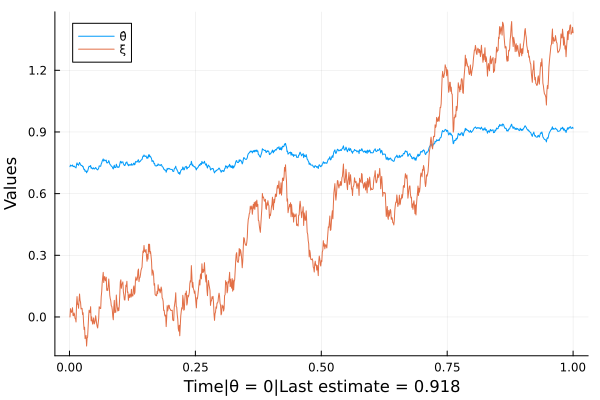

In [14]:
dW = [0.0]
append!(dW, rand(Normal(0, Δₜ ^ .5), length(time) - 1))
W = cumsum(dW)
p = .15
θ = rand(Bernoulli(p))
p = .5

dξ = [0.0]
append!(dξ, dW[2:end] .+ θ * Δₜ)
ξ = cumsum(dξ)
θ̂ = cdf.(Logistic(), (p / (1 - p)) .* exp.(ξ .- time ./ 2))
plot(time, [θ̂, ξ], label=["θ̂" "ξ"])
xlabel!("Time|θ = " * string(θ * 1) * "|Last estimate = " * string(round(θ̂[end]; digits = 3)))
ylabel!("Values")

And when time of observation is longer (but length between observations is also longer).

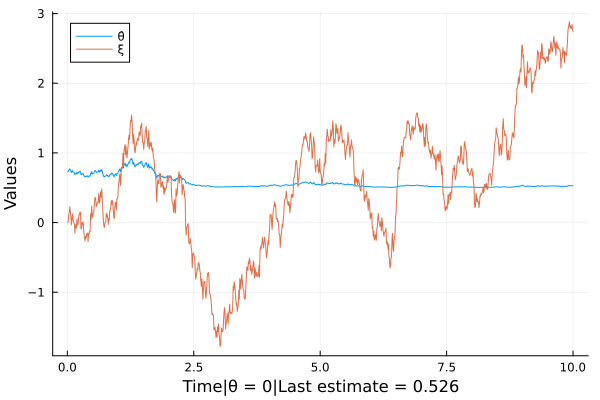

In [15]:
Δₜ = 1 / 100
time = (1:1000) / 100;

dW = [0.0]
append!(dW, rand(Normal(0, Δₜ ^ .5), length(time) - 1))
W = cumsum(dW)
p = .15
θ = rand(Bernoulli(p))
p = .5

dξ = [0.0]
append!(dξ, dW[2:end] .+ θ * Δₜ)
ξ = cumsum(dξ)
θ̂ = cdf.(Logistic(), (p / (1 - p)) .* exp.(ξ .- time ./ 2))
plot(time, [θ̂, ξ], label=["θ̂" "ξ"])
xlabel!("Time|θ = " * string(θ * 1) * "|Last estimate = " * string(round(θ̂[end]; digits = 3)))
ylabel!("Values")

So correct choice for p is crucial.

When number of observations is greater than 1

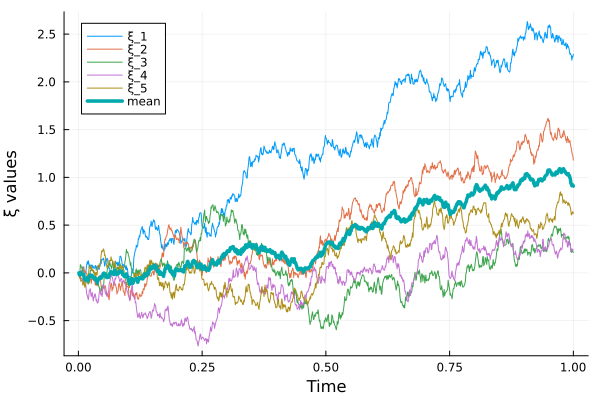

In [16]:
Δₜ = 1 / 1000
time = (1:1000) / 1000
n = 5

dW = Array{Real}(undef, (1000, n))
W  = Array{Real}(undef, (1000, n))
dW[1, :] = zeros(n)
for k in 2:1000
    dW[k, :] = rand(Normal(0, Δₜ ^ .5), n)
end # end for
for k in 1:n
    W[:, k] = cumsum(dW[:, k])
end # end for
p = .5
θ = rand(Bernoulli(p))

dξ = Array{Real}(undef, (1000, n))
ξ  = Array{Real}(undef, (1000, n + 1))
dξ[1, :] = zeros(n)
dξ[2:end, :] = dW[2:end, :] .+ θ * Δₜ

for k in 1:n
    ξ[:, k] = cumsum(dξ[:, k])
end # end for

ξ[:, 6] = map(mean, eachrow(ξ[:, 1:n]))


plot(time, ξ, 
    label = reduce(hcat, [permutedims(["ξ_$k" for k in 1:n]), "mean"]), 
    linewidth = reduce(vcat, [[1 for k in 1:n], 3.5])')
xlabel!("Time")
ylabel!("ξ values")

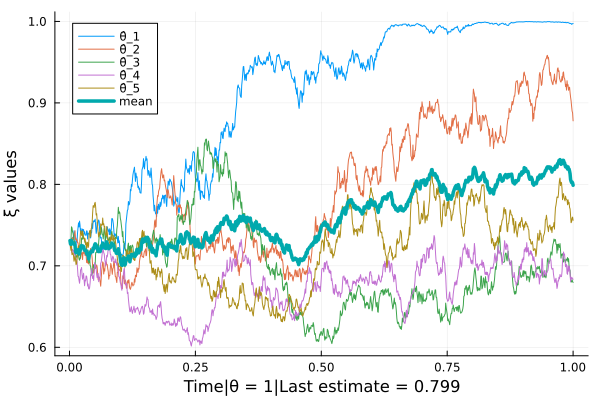

In [17]:
θ̂ = Array{Real}(undef, (1000, n + 1))
θ̂[:, 1:n] = cdf.(Logistic(), (p / (1 - p)) .* exp.(ξ[:, 1:n] .- time ./ 2))
θ̂[:, 6] = map(mean, eachrow(θ̂[:, 1:n]))

plot(time, θ̂, 
    label = reduce(hcat, [permutedims(["θ̂_$k" for k in 1:n]), "mean"]),
    linewidth = reduce(vcat, [[1 for k in 1:n], 3.5])')
xlabel!("Time|θ = $(1 * θ)" * "|Last estimate = $(round(θ̂[size(θ̂, 1), n+1]; digits = 3))")
ylabel!("ξ values")